In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


/Users/justingosses/anaconda/envs/MannvilleDask/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
# from sklearn.datasets import load_digits

In [4]:
import umap

In [5]:

# digits = load_digits()

# embedding = umap.UMAP(n_neighbors=5,
#                       min_dist=0.3,
#                       metric='correlation').fit_transform(digits.data)

In [6]:
iris = load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

/Users/justingosses/anaconda/envs/MannvilleDask/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


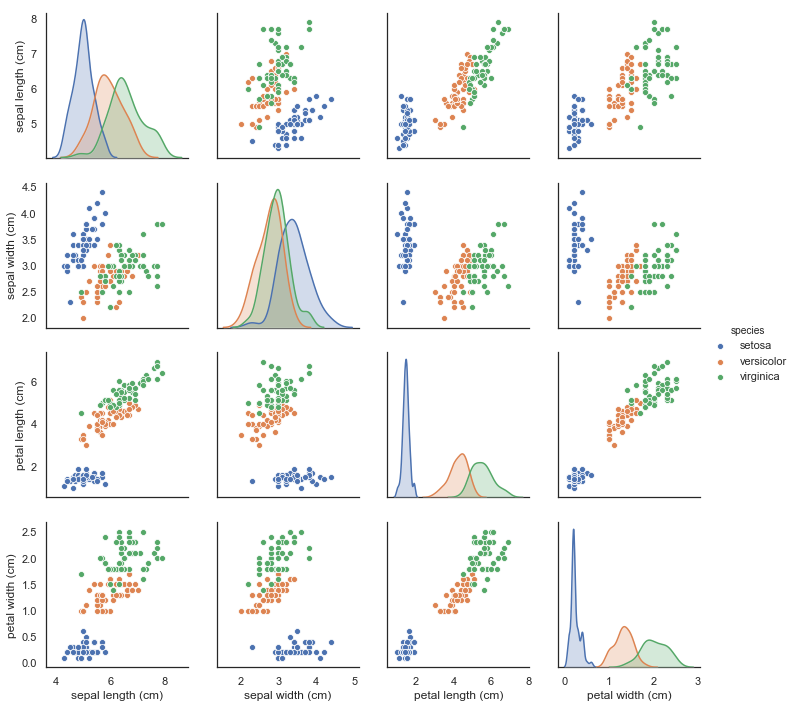

In [7]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species');

In [8]:
reducer = umap.UMAP()

In [9]:
embedding = reducer.fit_transform(iris.data)
embedding.shape


/Users/justingosses/anaconda/envs/MannvilleDask/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/justingosses/anaconda/envs/MannvilleDask/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 2 connected components using meta-embedding (experimental)
  n_components


(150, 2)

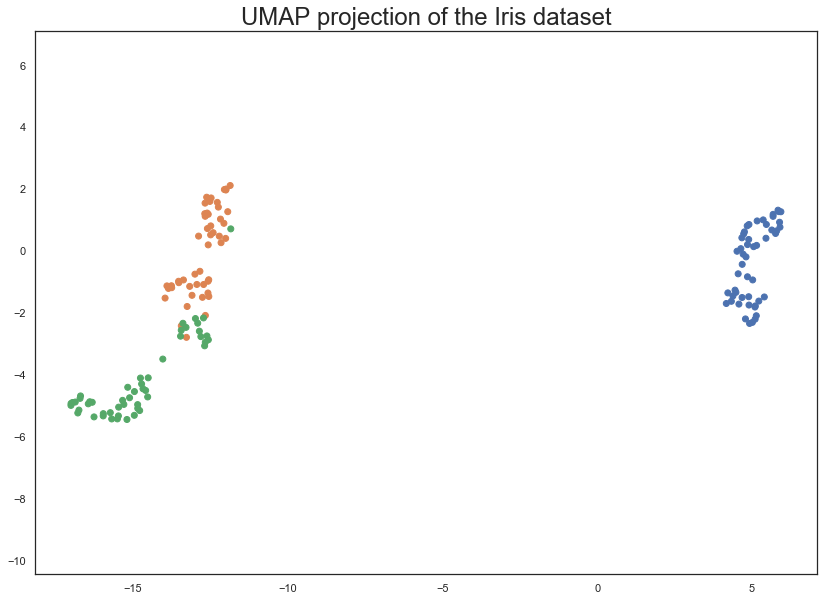

In [10]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

---------------------

-------------

In [11]:
knn_dir = "../WellsKNN/"
load_dir = "../loadLAS"
features_dir = "../createFeatures/"

In [12]:
h5_to_load = 'df_all_wells_wKNN_DEPTHtoDEPT_KNN1PredTopMcM_20180724.h5'
h5_key = 'df'
df_all_Col_preSplit = pd.read_hdf(features_dir+h5_to_load, h5_key)

In [13]:
all_col = list(df_all_Col_preSplit.columns)
all_col

['CALI',
 'COND',
 'DELT',
 'DENS',
 'DEPT',
 'DEPTH',
 'DPHI',
 'DPHI:1',
 'DPHI:2',
 'DT',
 'GR',
 'GR:1',
 'GR:2',
 'IL',
 'ILD',
 'ILD:1',
 'ILD:2',
 'ILM',
 'LITH',
 'LLD',
 'LLS',
 'NPHI',
 'PHID',
 'PHIN',
 'RESD',
 'RHOB',
 'RT',
 'SFL',
 'SFLU',
 'SN',
 'SNP',
 'SP',
 'UWI',
 'SitID',
 'McMurray_Base_HorID',
 'McMurray_Top_HorID',
 'McMurray_Base_DEPTH',
 'McMurray_Top_DEPTH',
 'McMurray_Base_Qual',
 'McMurray_Top_Qual',
 'lat',
 'lng',
 'NN1_McMurray_Top_DEPTH',
 'NN1_McMurray_Base_DEPTH',
 'NN1_thickness',
 'MM_Top_Depth_predBy_NN1thick',
 'HorID',
 'Pick',
 'Quality',
 'HorID_paleoz',
 'Pick_paleoz',
 'Quality_paleoz',
 'diff_TMcM_Pick_v_DEPT',
 'diff_TPal_Pick_v_DEPT',
 'cat_isTopMcMrNearby_known',
 'cat_isTopPalNearby_known',
 'DistFrom_NN1_TopDepth_Abs',
 'NewWell',
 'LastBitWell',
 'TopWellDept',
 'BotWellDept',
 'FromTopWell',
 'FromBotWell',
 'WellThickness',
 'closerToBotOrTop',
 'closTopBotDist',
 'rowsToEdge',
 'GR_min_5winSize_dirAroundMin',
 'GR_min_5winSize_dirA

In [25]:
featuresSmallList = ['cat_isTopMcMrNearby_known','DPHI',
 'GR',
 'ILD',
 'NN1_thickness',
 'Quality',
 'DistFrom_NN1_TopDepth_Abs',
 'WellThickness',
 'GR_min_5winSize_dirAroundMin',
 'GR_min_5winSize_dirAboveMin',
 'GR_min_5winSize_dirAroundMax']

In [26]:
small_test = df_all_Col_preSplit[featuresSmallList][0:20000].fillna(0)

In [27]:
reducer = umap.UMAP()

In [28]:
embedding = reducer.fit_transform(small_test)
embedding.shape

/Users/justingosses/anaconda/envs/MannvilleDask/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 5 connected components using meta-embedding (experimental)
  n_components
/Users/justingosses/anaconda/envs/MannvilleDask/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(20000, 2)

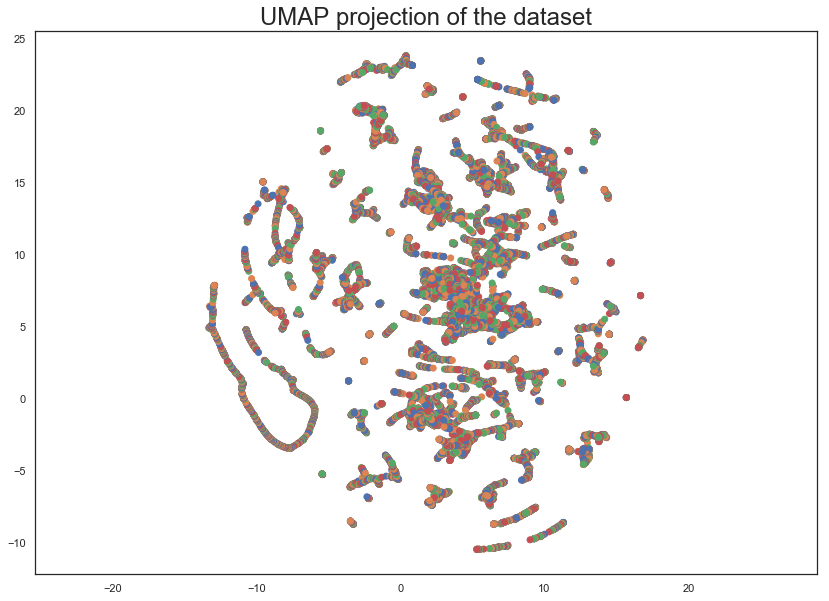

In [29]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in [0,1,2,3]])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24);

In [ ]:
iris_df = pd.DataFrame(df_all_Col_preSplit, columns=df_all_Col_preSplit[featuresSmallList])
# iris_df['cat_isTopMcMrNearby_known'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='cat_isTopMcMrNearby_known');

In [ ]:
digits.data = pd.DataFrame(df_all_Col_preSplit, columns=df_all_Col_preSplit[featuresSmallList])

In [30]:
reducer = umap.UMAP(random_state=42)
reducer.fit(small_test)

/Users/justingosses/anaconda/envs/MannvilleDask/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding 5 connected components using meta-embedding (experimental)
  n_components
/Users/justingosses/anaconda/envs/MannvilleDask/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=42,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=False)

In [ ]:
# UMAP(a=1.576943460405378, alpha=1.0, angular_rp_forest=False,
#    b=0.8950608781227859, bandwidth=1.0, gamma=1.0, init='spectral',
#    local_connectivity=1.0, metric='euclidean', metric_kwds={},
#    min_dist=0.1, n_components=2, n_epochs=None, n_neighbors=15,
#    negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
#    spread=1.0, target_metric='cat_isTopMcMrNearby_known', target_metric_kwds={},
#    transform_queue_size=4.0, transform_seed=42, verbose=False)

In [31]:
embedding = reducer.transform(small_test)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(20000, 2)

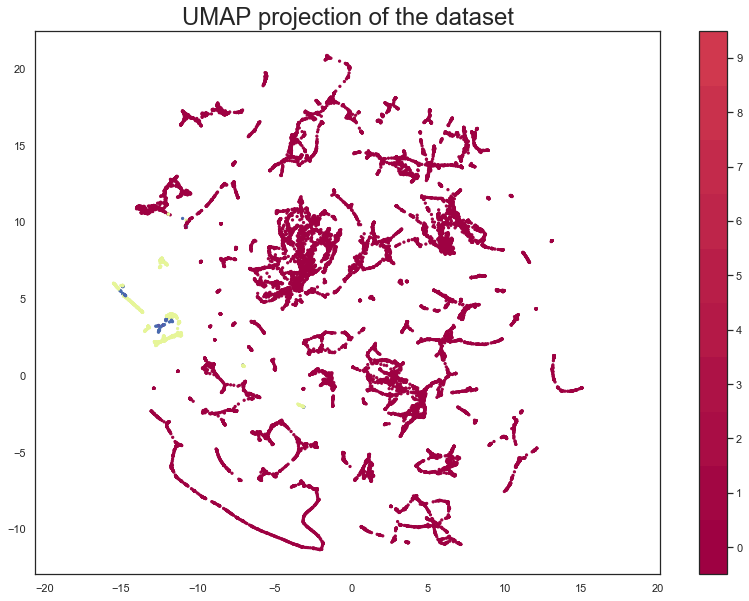

In [32]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=small_test.cat_isTopMcMrNearby_known, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the dataset', fontsize=24);